<a href="https://colab.research.google.com/github/joaopamaral/tcc_puc_cdbd/blob/master/EDA_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória dos dados - Reducing Commercial Aviation Fatalities

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
import sys
import os
import math

IN_COLAB = 'google.colab' in sys.modules

%matplotlib inline

In [0]:
gdrive_kaggle_dir = '/gdrive/My Drive/Kaggle'
api_gdrive_credential_location = f'{gdrive_kaggle_dir}/kaggle.json'
data_gdrive_dir = f'{gdrive_kaggle_dir}/reducing-commercial-aviation-fatalities'
api_local_credential_location = os.path.join(os.path.expanduser('~'), '.kaggle/kaggle.json')

In [0]:
if IN_COLAB:
    if not os.path.isfile('train.csv.zip') or not os.path.isfile('test.csv.zip'):
        from google.colab import drive
        drive.mount('/gdrive')

        if os.path.isdir(gdrive_kaggle_dir):
            if os.path.isfile(f'{data_gdrive_dir}/test.csv.zip') and os.path.isfile(f'{data_gdrive_dir}/train.csv.zip'):
                !cp '{data_gdrive_dir}/train.csv.zip' .
                !cp '{data_gdrive_dir}/test.csv.zip' .
            else:
                !mkdir -p ~/.kaggle
                !cp '{api_gdrive_credential_location}' '{api_local_credential_location}'

if not os.path.isfile('train.csv.zip') or not os.path.isfile('test.csv.zip'):
    if os.path.isfile(api_local_credential_location):
        !pip -q install kaggle --upgrade
        !kaggle competitions download -c reducing-commercial-aviation-fatalities
        if IN_COLAB and os.path.isdir(gdrive_kaggle_dir):
            !cp train.csv.zip '{data_gdrive_dir}'
            !cp test.csv.zip '{data_gdrive_dir}'

In [0]:
coluns_types = {
    'crew': 'category',
    'experiment': 'category',
    'seat': 'category',
    'event': 'category'
}

train_df = pd.read_csv('train.csv.zip', dtype = coluns_types)

float64_columns = train_df.select_dtypes(np.float64).columns
train_df[float64_columns] = train_df[float64_columns].astype(np.float16)

In [5]:
train_df.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.285156,26.781250,-9.523438,-12.796875,16.718750,33.75000,23.718750,-6.695312,29.234375,24.843750,3.921875,18.453125,1.075195,3.089844,37.375000,17.437500,19.203125,20.593750,-3.951172,14.507812,-4520.0,817.5,388.75,A
1,1,CA,0.015625,1,-2.427734,28.437500,-9.320312,-3.757812,15.968750,30.43750,21.015625,-6.476562,26.640625,24.140625,5.468750,20.515625,2.833984,7.101562,31.171875,19.406250,19.687500,21.359375,1.332031,17.750000,-4520.0,817.5,388.75,A
2,1,CA,0.019531,1,10.671875,30.421875,15.351562,24.718750,16.140625,32.15625,25.437500,-0.088684,28.125000,26.890625,8.578125,23.156250,4.519531,12.703125,-12.015625,19.390625,23.171875,22.406250,1.538086,22.250000,-4520.0,817.5,388.75,A
3,1,CA,0.023438,1,11.453125,25.609375,2.433594,12.414062,20.531250,31.50000,19.140625,-0.256592,30.656250,24.250000,8.640625,19.968750,7.277344,11.460938,18.578125,23.156250,22.640625,19.343750,2.544922,19.000000,-4520.0,817.5,388.75,A
4,1,CA,0.027344,1,7.285156,25.937500,0.113586,5.746094,19.828125,28.75000,20.578125,-1.953125,31.718750,25.156250,12.500000,18.750000,7.308594,8.007812,6.554688,22.750000,22.671875,20.296875,1.699219,22.812500,-4520.0,817.5,388.75,A


In [6]:
train_df.describe(include='all')

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
count,4867421,4867421,4.867421e+06,4867421,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4867421.0,4867421.0,4867421.0,4867421
unique,9,3,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,6,DA,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
freq,552958,1658393,NaN,2433939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2848809
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,3.000259e-03,NaN,-1.361000e+03,-1.581000e+03,-1.644000e+03,-1.517000e+03,-1.221000e+03,-1.266000e+03,-1.280000e+03,-1.393000e+03,-2.888000e+03,-1.227000e+03,-2.876000e+03,-1.353000e+03,-4.064000e+03,-2.334000e+03,-1.212000e+03,-1.228000e+03,-1.229000e+03,-1.230000e+03,-6.965000e+02,-1.176000e+03,-18592.0,482.0,0.0,NaN
25%,NaN,NaN,8.806250e+01,NaN,-9.203125e+00,-8.328125e+00,-8.765625e+00,-7.367188e+00,-6.101562e+00,-6.007812e+00,-6.902344e+00,-9.578125e+00,-6.656250e+00,-6.582031e+00,-7.644531e+00,-9.289062e+00,-8.054688e+00,-9.304688e+00,-7.496094e+00,-6.714844e+00,-6.773438e+00,-7.160156e+00,-7.816406e+00,-6.527344e+00,-2550.0,663.0,524.0,NaN
50%,NaN,NaN,1.768750e+02,NaN,3.818359e-01,4.263306e-02,1.140137e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.894043e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.170654e-01,1.106567e-01,5.667114e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5920.0,743.5,770.0,NaN
75%,NaN,NaN,2.682500e+02,NaN,1.030469e+01,8.750000e+00,9.281250e+00,7.437500e+00,6.175781e+00,6.085938e+00,7.070312e+00,1.063281e+01,6.781250e+00,6.746094e+00,7.808594e+00,9.953125e+00,8.632812e+00,9.773438e+00,7.765625e+00,6.832031e+00,6.906250e+00,7.464844e+00,8.023438e+00,6.613281e+00,10288.0,813.5,1197.0,NaN


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 28 columns):
crew          category
experiment    category
time          float16
seat          category
eeg_fp1       float16
eeg_f7        float16
eeg_f8        float16
eeg_t4        float16
eeg_t6        float16
eeg_t5        float16
eeg_t3        float16
eeg_fp2       float16
eeg_o1        float16
eeg_p3        float16
eeg_pz        float16
eeg_f3        float16
eeg_fz        float16
eeg_f4        float16
eeg_c4        float16
eeg_p4        float16
eeg_poz       float16
eeg_c3        float16
eeg_cz        float16
eeg_o2        float16
ecg           float16
r             float16
gsr           float16
event         category
dtypes: category(4), float16(24)
memory usage: 241.4 MB


In [8]:
train_df.isna().sum()

crew          0
experiment    0
time          0
seat          0
eeg_fp1       0
eeg_f7        0
eeg_f8        0
eeg_t4        0
eeg_t6        0
eeg_t5        0
eeg_t3        0
eeg_fp2       0
eeg_o1        0
eeg_p3        0
eeg_pz        0
eeg_f3        0
eeg_fz        0
eeg_f4        0
eeg_c4        0
eeg_p4        0
eeg_poz       0
eeg_c3        0
eeg_cz        0
eeg_o2        0
ecg           0
r             0
gsr           0
event         0
dtype: int64

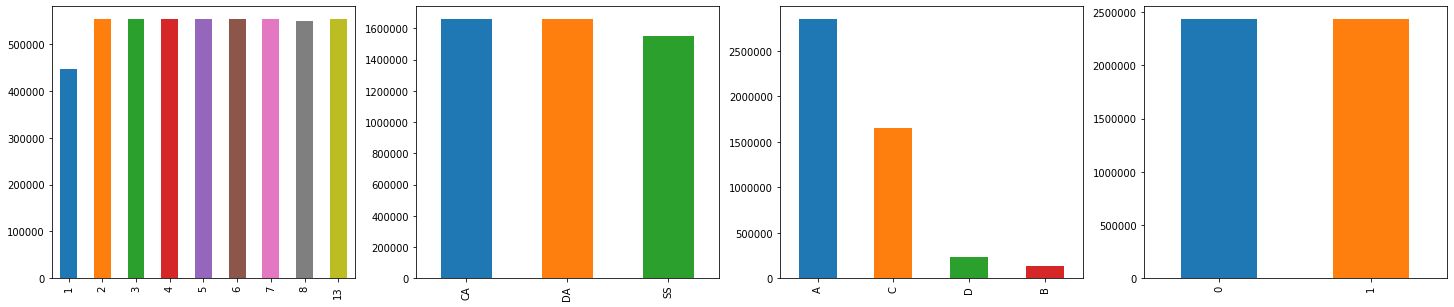

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(25,5))

train_df.crew.value_counts().sort_index().plot.bar(ax=ax[0], color=sns.color_palette());
train_df.experiment.value_counts().sort_index().plot.bar(ax=ax[1], color=sns.color_palette());
train_df.event.value_counts().sort_index().plot.bar(ax=ax[2], color=sns.color_palette());
train_df.seat.value_counts().sort_index().plot.bar(ax=ax[3], color=sns.color_palette());

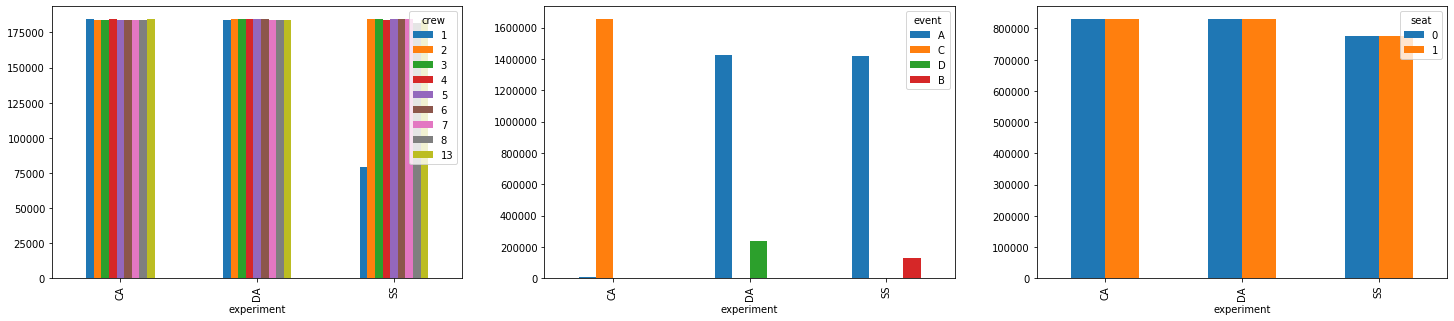

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(25,5))

train_df.groupby('crew').experiment.value_counts().unstack(0).sort_index().plot.bar(ax=ax[0]);
train_df.groupby('event').experiment.value_counts().unstack(0).sort_index().plot.bar(ax=ax[1]);
train_df.groupby('seat').experiment.value_counts().unstack(0).sort_index().plot.bar(ax=ax[2]);

Distração será considerado dois events DA e SS ou seja eventos D e B

In [0]:
train_df['distraction'] = train_df['event'].isin(['D', 'B'])

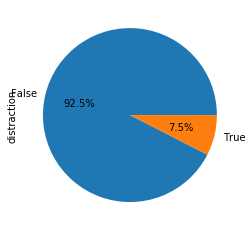

In [12]:
train_df['distraction'].value_counts().plot.pie(autopct='%1.1f%%');

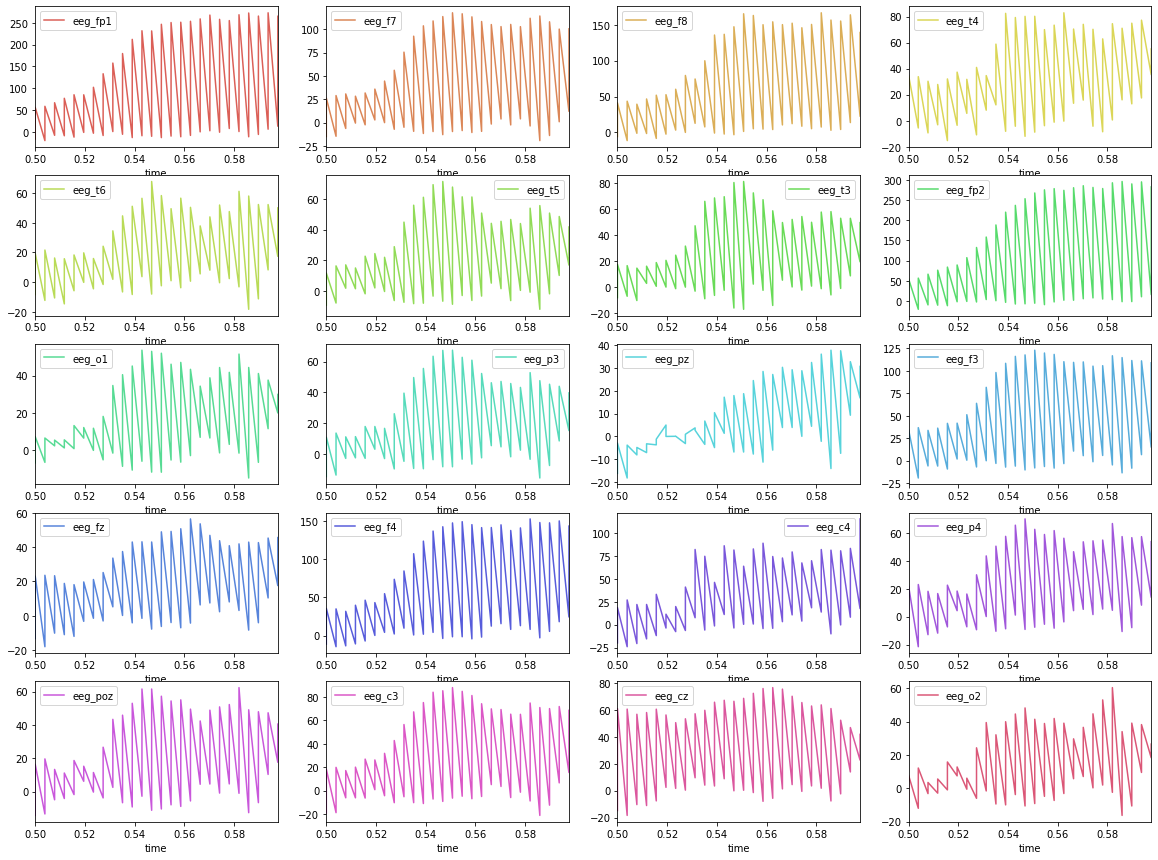

In [13]:
def plot_eeg(crew='1', experiment='CA', start_time=.5, end_time=.6):
    eeg_cols = train_df.columns[train_df.columns.str.contains('eeg_')]
    fig, ax = plt.subplots(math.ceil(eeg_cols.size / 4), 4, figsize=(20, 15))
    c = sns.color_palette("hls", eeg_cols.size)
    for ix, col in enumerate(eeg_cols):
        train_df.loc[(train_df.crew == crew) & (train_df.experiment == experiment) & 
                     train_df.time.between(start_time, end_time), ['time', col]].set_index('time').sort_index().plot(ax=ax[ix // 4, ix % 4], color=c[ix], legend=True)

plot_eeg()

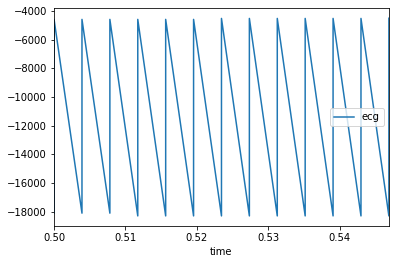

In [14]:
def plot_ecg(crew='1', experiment='CA', start_time=.5, end_time=.55):
    train_df.loc[(train_df.crew == crew) & (train_df.experiment == experiment) & 
                     train_df.time.between(start_time, end_time), ['time', 'ecg']].set_index('time').sort_index().plot(legend=True);

plot_ecg()

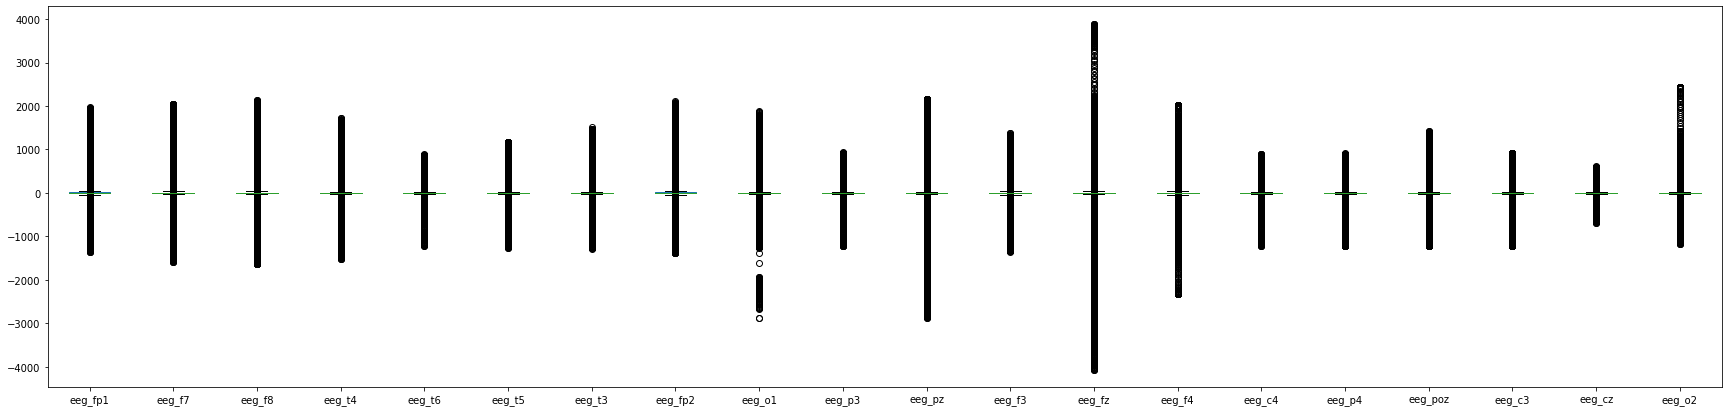

In [15]:
train_df.loc[:, train_df.columns.str.contains('eeg')].plot.box(figsize=(30,7));

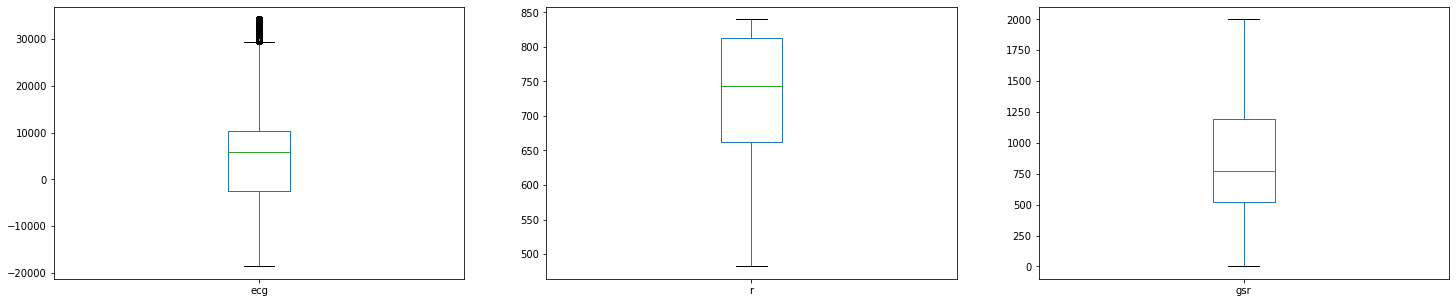

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(25,5))

train_df['ecg'].plot.box(ax=ax[0]);
train_df['r'].plot.box(ax=ax[1]);
train_df['gsr'].plot.box(ax=ax[2]);

In [0]:
# pp.ProfileReport(train_df).to_file("report-reducing-commercial-aviation-fatalities.html")

In [0]:
train_df = train_df.drop_duplicates()

![alt text](https://scikit-learn.org/stable/_static/ml_map.png)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [0]:
features = [*train_df.columns[train_df.columns.str.contains('eeg')], 'ecg', 'r', 'gsr']
target = 'distraction'

X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df[target], test_size=0.30, random_state=42, stratify=train_df[target])

In [25]:
print(f'Quantidade de dados de treinamento: {y_train.shape[0]}')
print(f'Quantidade de dados de teste: {X_test.shape[0]}')

Quantidade de dados de treinamento: 3406701
Quantidade de dados de teste: 1460015


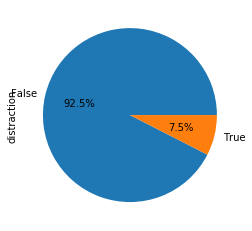

In [26]:
y_train.value_counts().plot.pie(autopct='%1.1f%%');

In [0]:
def show_metrics(model, X_test, y_test, labels=['Not Distracted', 'Distracted']):
    fig, ax = plt.subplots(2, 2, figsize=(10, 7))

    plot_confusion_matrix(model, X_test, y_test, display_labels=labels, cmap=plt.cm.Blues, ax=ax[0, 0])
    ax[0, 0].set_title('Confusion matrix, without normalization')

    plot_confusion_matrix(model, X_test, y_test, display_labels=labels, cmap=plt.cm.Blues, normalize='true', ax=ax[0, 1])
    ax[0, 1].set_title('Normalized confusion matrix')

    disp = plot_precision_recall_curve(model, X_test, y_test, ax=ax[1, 0])
    ax[1, 0].set_title('Precision-Recall Curve')

    plot_roc_curve(model, X_test, y_test, ax=ax[1, 1])
    ax[1, 1].set_title('ROC Curve')

    plt.tight_layout()
    plt.show()

    y_predict = model.predict(X_test)

    display(pd.DataFrame(classification_report(y_test, y_predict, output_dict=True)).T)

In [87]:
sgd_model = make_pipeline(StandardScaler(),
                          SGDClassifier(n_jobs=-1, class_weight='balanced')) # verbose=1)
sgd_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                               loss='hinge', max_iter=1000, n_iter_no_change=5,
                               n_jobs=-1, penalty='l2', power_t=0.5,
                               random_state=None, shuffle=True, tol=0.001,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False))],
         verbose=False)

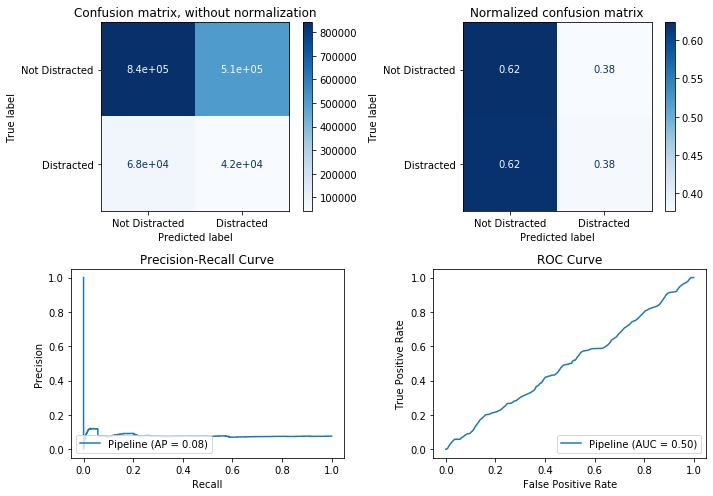

,precision,recall,f1-score,support
False,0.925067,0.623169,0.744684,1.350247e+06
True,0.075596,0.379072,0.126054,1.097680e+05
accuracy,0.604817,0.604817,0.604817,6.048171e-01
macro avg,0.500332,0.501121,0.435369,1.460015e+06
weighted avg,0.861202,0.604817,0.698173,1.460015e+06


In [88]:
show_metrics(sgd_model, X_test, y_test)

In [97]:
lr_model = make_pipeline(StandardScaler(),
                         LogisticRegressionCV(cv=5, n_jobs=-1, class_weight='balanced'))
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregressioncv',
                 LogisticRegressionCV(Cs=10, class_weight='balanced', cv=5,
                                      dual=False, fit_intercept=True,
                                      intercept_scaling=1.0, l1_ratios=None,
                                      max_iter=100, multi_class='auto',
                                      n_jobs=-1, penalty='l2',
                                      random_state=None, refit=True,
                                      scoring=None, solver='lbfgs', tol=0.0001,
                                      verbose=0))],
         verbose=False)

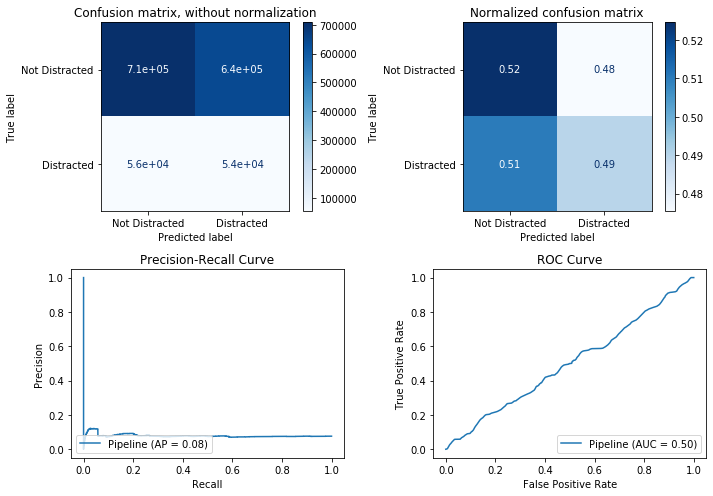

,precision,recall,f1-score,support
False,0.926707,0.524571,0.669925,1.350247e+06
True,0.077259,0.489660,0.133461,1.097680e+05
accuracy,0.521946,0.521946,0.521946,5.219460e-01
macro avg,0.501983,0.507115,0.401693,1.460015e+06
weighted avg,0.862843,0.521946,0.629592,1.460015e+06


In [98]:
show_metrics(lr_model, X_test, y_test)

In [0]:
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced')
rf_model.fit(X_train, y_train)

In [0]:
show_metrics(rf_model, X_test, y_test)